# Library

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [3]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [4]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [5]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [6]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# Random Forest

### Default

In [9]:
time1_rf = datetime.datetime.now()
rf_gini = RandomForestClassifier(n_estimators=500, max_leaf_nodes=19, n_jobs=-1, random_state=None)
model = rf_gini.fit(X_train, y_train)

y_pred_rf_gini = rf_gini.predict(X_test)
y_probs_rf_gini = rf_gini.predict_proba(X_test)[:, 1]
time2_rf = datetime.datetime.now()
print_score(y_test,y_pred_rf,time1_rf,time2_rf)

comfusion matrix = 
[[2824   72]
 [  76 4121]]

accuracy_score =  0.9791343578175666

completeness =  0.9818918274958304
contamination =  0.017171476269973767

precision score =  0.9828285237300263
recall score =  0.9818918274958304

F1 score =  0.9823599523241956

time span=  0:00:05.456667


### entropy

In [10]:
time1_rf_ent = datetime.datetime.now()
rf_ent = RandomForestClassifier(criterion="entropy",n_estimators=500, 
                                 max_leaf_nodes=19, n_jobs=-1, random_state=None)
model = rf_ent.fit(X_train, y_train)

y_pred_rf_ent = rf_ent.predict(X_test)
y_probs_rf_ent = rf_ent.predict_proba(X_test)[:, 1]
time2_rf_ent = datetime.datetime.now()
print_score(y_test,y_pred_rf_ent,time1_rf_ent,time2_rf_ent)

comfusion matrix = 
[[2823   73]
 [  71 4126]]

accuracy_score =  0.9796982940927675

completeness =  0.9830831546342625
contamination =  0.01738509168849726

precision score =  0.9826149083115028
recall score =  0.9830831546342625

F1 score =  0.9828489757027157

time span=  0:00:09.804689


## Handling Imbalanced Classes

### Gini

In [12]:
time1_rf_gini_imba = datetime.datetime.now()
rf_gini_imba = RandomForestClassifier(n_estimators=500, max_leaf_nodes=19, 
                                 n_jobs=-1, random_state=None,class_weight="balanced")

model = rf_gini_imba.fit(X_train, y_train)

y_pred_rf_gini_imba = rf_gini_imba.predict(X_test)
y_probs_rf_gini_imba = rf_gini_imba.predict_proba(X_test)[:, 1]
time2_rf_gini_imba = datetime.datetime.now()
print_score(y_test,y_pred_rf_gini_imba,time1_rf_gini_imba,time2_rf_gini_imba)

comfusion matrix = 
[[2848   48]
 [ 107 4090]]

accuracy_score =  0.9781474693359651

completeness =  0.9745055992375506
contamination =  0.011599806669888834

precision score =  0.9884001933301112
recall score =  0.9745055992375506

F1 score =  0.9814037192561488

time span=  0:00:05.507210


In [13]:
time1_rf_ent_imba = datetime.datetime.now()
rf_ent_imba = RandomForestClassifier(criterion="entropy",n_estimators=500, max_leaf_nodes=19, 
                                 n_jobs=-1, random_state=None,class_weight="balanced")

model = rf_ent_imba.fit(X_train, y_train)

y_pred_rf_ent_imba = rf_ent_imba.predict(X_test)
y_probs_rf_ent_imba = rf_ent_imba.predict_proba(X_test)[:, 1]
time2_rf_ent_imba = datetime.datetime.now()
print_score(y_test,y_pred_rf_ent_imba,time1_rf_ent_imba,time2_rf_ent_imba)

comfusion matrix = 
[[2848   48]
 [ 115 4082]]

accuracy_score =  0.9770195967855633

completeness =  0.9725994758160591
contamination =  0.01162227602905569

precision score =  0.9883777239709443
recall score =  0.9725994758160591

F1 score =  0.9804251230935511

time span=  0:00:09.393041


## Feature Importance DT

<IPython.core.display.Javascript object>


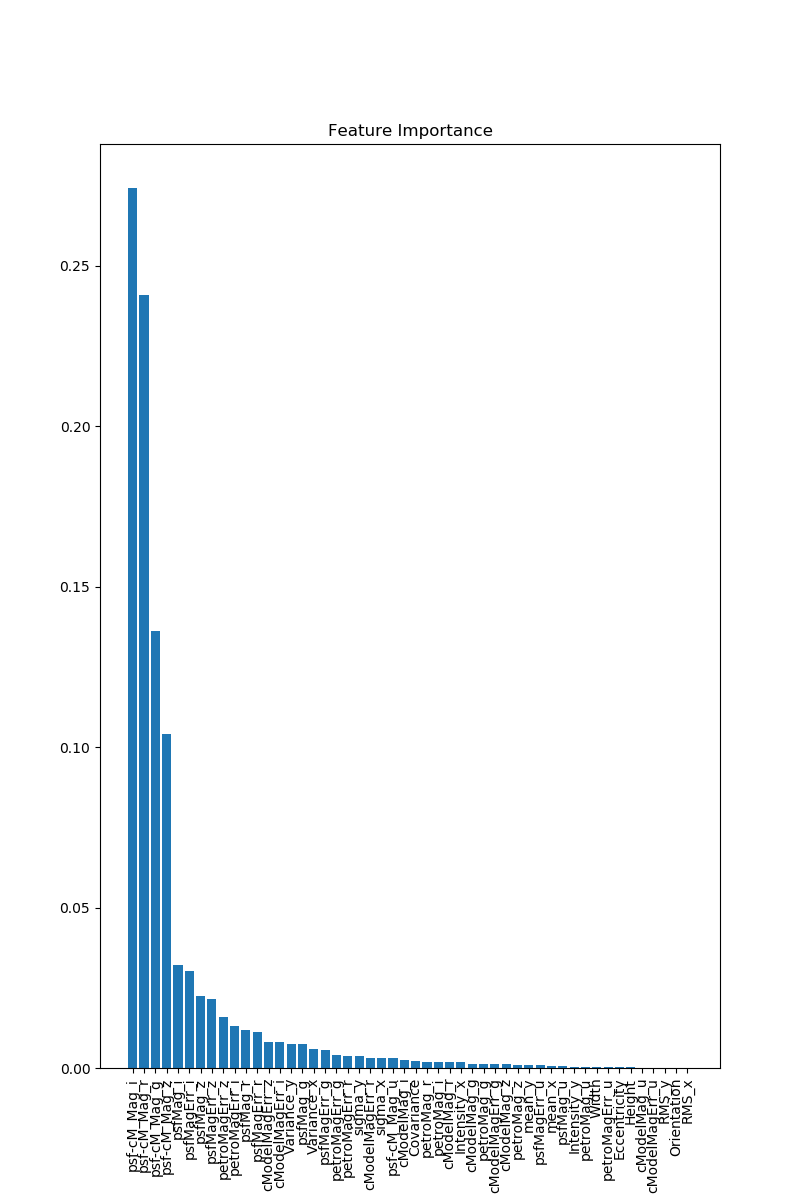

In [14]:
# Calculate feature importances
importances = rf_gini_imba.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,12))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

## Cross-validation

In [16]:
scores = cross_val_score(rf_gini_imba, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.96992481 0.97603383 0.97791353 0.96616541 0.97650376 0.97368421
 0.97556391 0.97838346 0.97601129 0.97224835]
Average cross-validation score: 0.97


,0
0,0.969925
1,0.976034
2,0.977914
3,0.966165
4,0.976504
5,0.973684
6,0.975564
7,0.978383
8,0.976011
9,0.972248


### Confusion Matrix

<IPython.core.display.Javascript object>


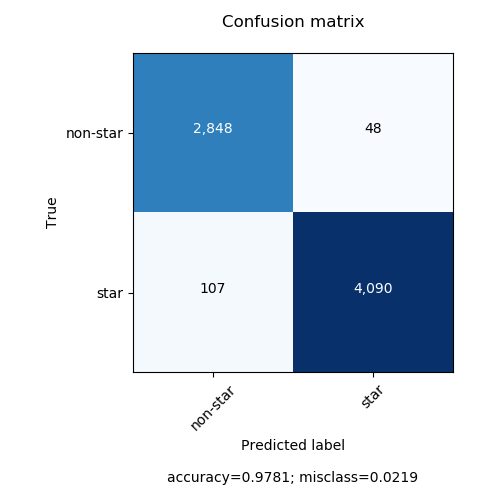

In [17]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_rf_gini_imba)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [19]:
score_rf_gini = score(y_test,y_pred_rf,time1_rf,time2_rf)
score_rf_ent = score(y_test,y_pred_rf_ent,time1_rf_ent,time2_rf_ent)
score_rf_gini_imba = score(y_test,y_pred_rf_gini_imba,time1_rf_gini_imba,time2_rf_gini_imba)
score_rf_ent_imba = score(y_test,y_pred_rf_ent_imba,time1_rf_ent_imba,time2_rf_ent_imba)

In [20]:
m1_t = pd.DataFrame({
 'accuracy' : [score_rf_gini[1],score_rf_ent[1],score_rf_gini_imba [1],score_rf_ent_imba[1]],
 'completeness' : [score_rf_gini[2],score_rf_ent[2],score_rf_gini_imba [2],score_rf_ent_imba[2]],
 'contamination' : [score_rf_gini[3],score_rf_ent[3],score_rf_gini_imba [3],score_rf_ent_imba[3]],
 'precision' : [score_rf_gini[4],score_rf_ent[4],score_rf_gini_imba [4],score_rf_ent_imba[4]],
 'recall' : [score_rf_gini[5],score_rf_ent[5],score_rf_gini_imba [5],score_rf_ent_imba[5]],
 'F1 score' : [score_rf_gini[6],score_rf_ent[6],score_rf_gini_imba [6],score_rf_ent_imba[6]],
 'time span' : [score_rf_gini[7],score_rf_ent[7],score_rf_gini_imba [7],score_rf_ent_imba[7]]
                })

m1_t.rename(index = {0: "RF_gini", 
                     1: "RF_entropy",
                     2: "RF_gini_imba",
                     3: "RF_ent_imba"
                    },inplace = True)

m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
RF_gini,0.979134,0.981892,0.017171,0.982829,0.981892,0.982360,00:00:05.456667
RF_entropy,0.979698,0.983083,0.017385,0.982615,0.983083,0.982849,00:00:09.804689
RF_gini_imba,0.978147,0.974506,0.011600,0.988400,0.974506,0.981404,00:00:05.507210
RF_ent_imba,0.977020,0.972599,0.011622,0.988378,0.972599,0.980425,00:00:09.393041


<IPython.core.display.Javascript object>


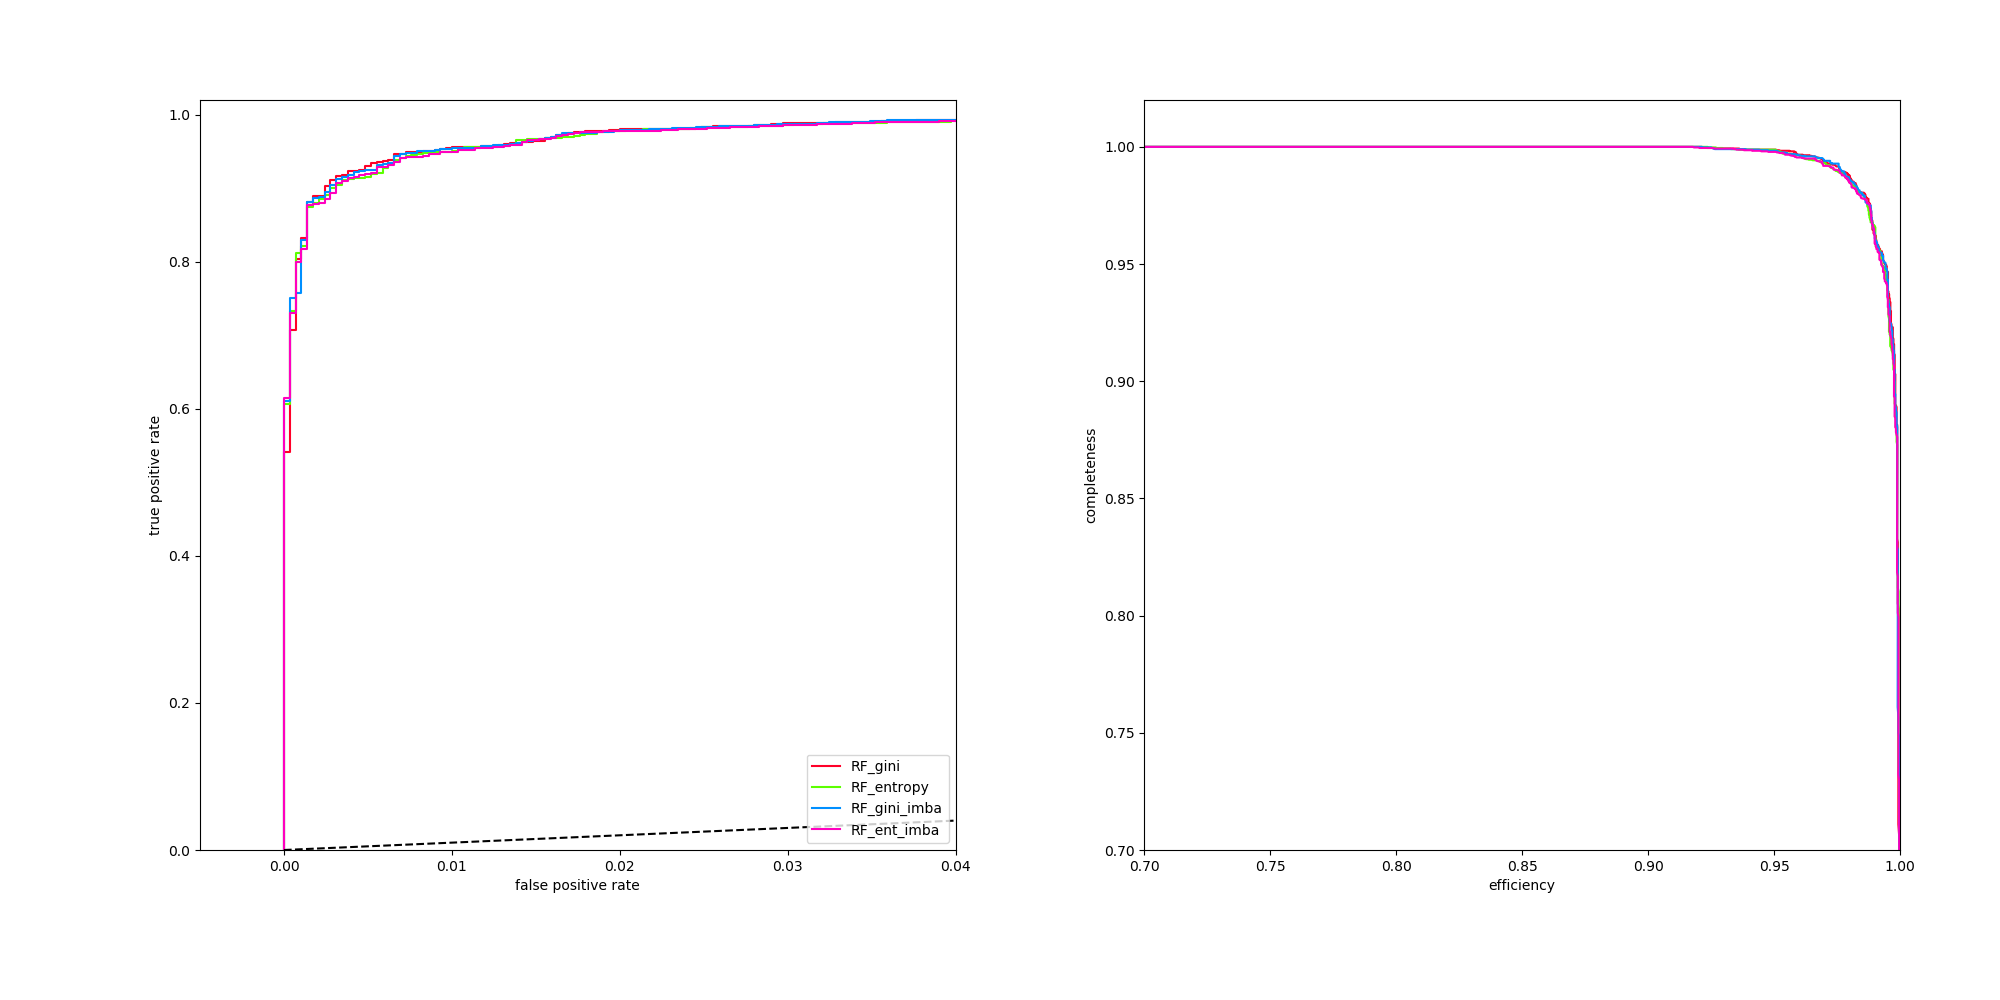

In [22]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_rf_gini, y_probs_rf_ent, y_probs_rf_gini_imba, y_probs_rf_ent_imba]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(-0.005, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()